# Loan Status Prediction

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

### Importing dataset

In [2]:
df = pd.read_csv('loan-status-dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

### Chcecking if there is null values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Dropping the null values

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


### Data Visualization

#### Gender counts and visualization with respect to loan eligibity

In [9]:
df.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

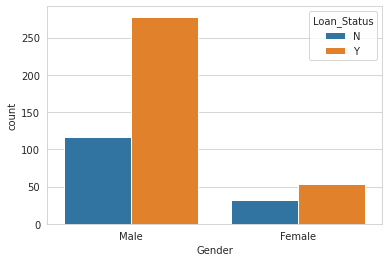

In [10]:
sns.countplot(x = 'Gender', hue='Loan_Status', data=df)
plt.show()

#### Visualization between marriage and loan status

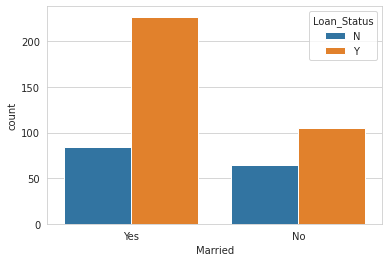

In [11]:
sns.countplot(x = 'Married', hue='Loan_Status', data=df)
plt.show()

#### Visualization between Education and Loan Status

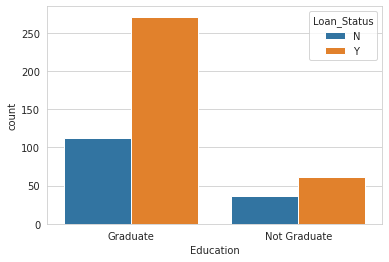

In [12]:
sns.countplot(x = 'Education', hue='Loan_Status', data=df)
plt.show()

#### Visualization between Self Employment and Loan Status

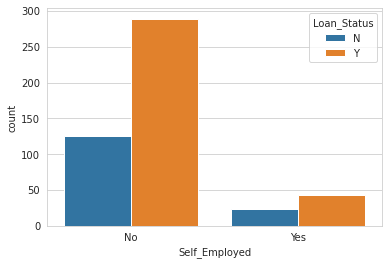

In [13]:
sns.countplot(x = 'Self_Employed', hue='Loan_Status', data=df)
plt.show()

#### Visualizaton between Applicant Income, Loan Amount with respect to Loan Status

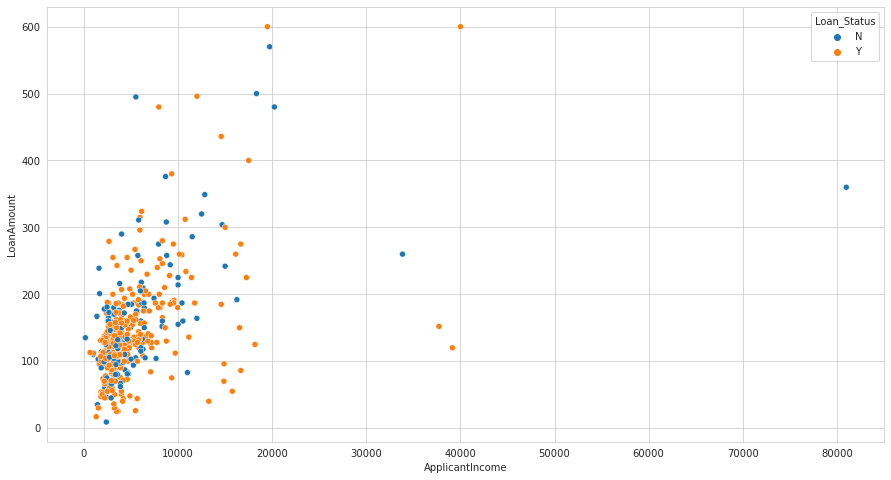

In [14]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', hue = 'Loan_Status', data=df)
plt.show()

#### Visualizaton between Co-Applicant Income, Loan Amount with respect to Loan Status

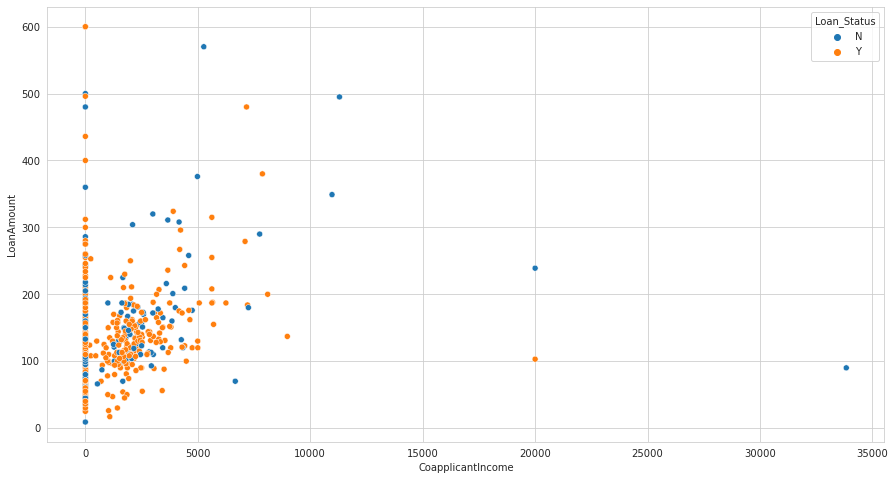

In [15]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'CoapplicantIncome', y = 'LoanAmount', hue = 'Loan_Status', data=df)
plt.show()

#### Visualizaton between Co-Applicant Income, Loan Amout Term with respect to Loan Status

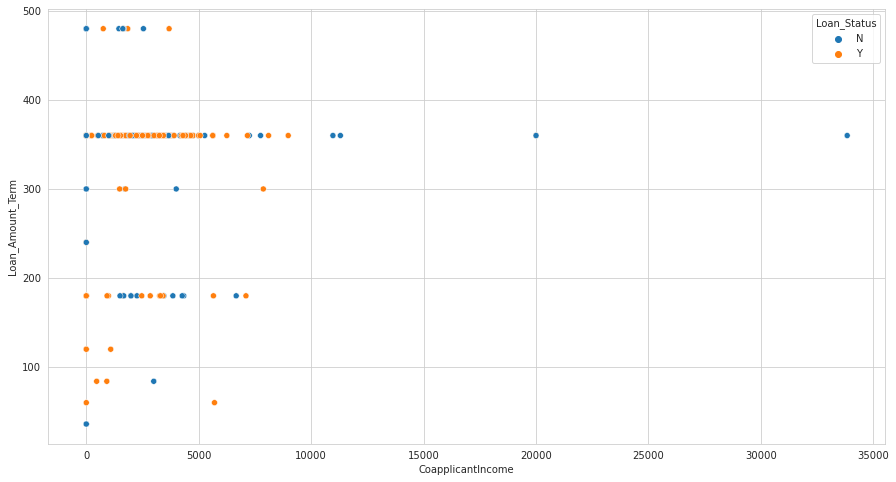

In [16]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = 'CoapplicantIncome', y = 'Loan_Amount_Term', hue = 'Loan_Status', data=df)
plt.show()

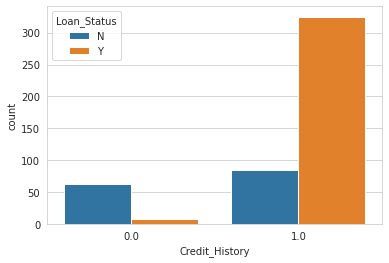

In [17]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data=df)
plt.show()

### Changing the categorial value into numeric value

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorial_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = le.fit_transform(df['Dependents'])

### Making the correlation and visualizing it

In [19]:
correlation = df.corr()

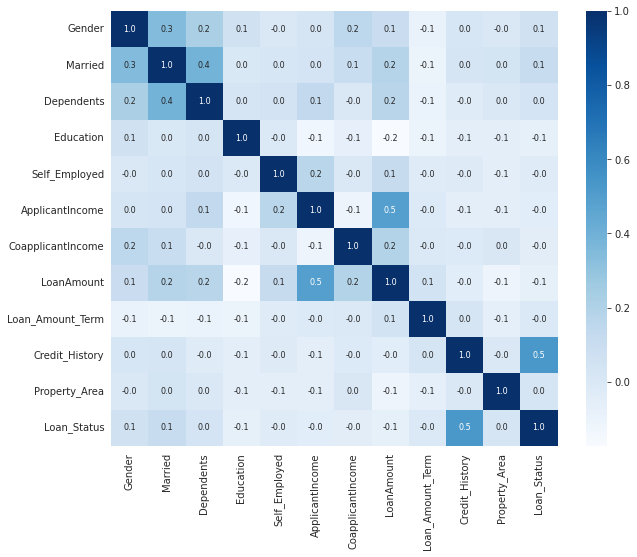

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cbar=True, annot=True, annot_kws={'size': 8}, fmt='.1f', cmap='Blues')
plt.show()

### Splitting the dataset into feature and target

In [21]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

### Splitting the dataset into Training and Test Set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=)

SyntaxError: invalid syntax (1046741729.py, line 2)

### Fitting different model into train datasetm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier

##### Making a function fit_model for model fitting

In [ ]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    print('The predicted values:\n ', model.predict(X_test))
    print('\nThe accuracy score: ', model.score(X_test, y_test))

### 1. Logistic Regression

In [ ]:
fit_model(LogisticRegression(), X_train, X_test, y_train, y_test)

### 2. Decision Tree Classifier

In [ ]:
fit_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

### 3. Random Forest Classifier

In [ ]:
fit_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

### 4. Support Vector Classifier

In [ ]:
fit_model(SVC(kernel='linear'), X_train, X_test, y_train, y_test)

### 5. XGB Classifier

In [ ]:
fit_model(XGBClassifier(), X_train, X_test, y_train, y_test)

### 6. XGBRF Classifier

In [ ]:
fit_model(XGBRFClassifier(), X_train, X_test, y_train, y_test)